In [4]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
#mlxtend is a python library of useful tools for the day to day data science tasks..

In [5]:
#we are reading this file like to not to get parse error
groceries = []
with open("groceries.csv") as f:
    groceries = f.read()

In [6]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")

In [7]:
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [8]:
all_groceries_list = [i for item in groceries_list for i in item]

In [9]:
from collections import Counter,OrderedDict

In [10]:
item_frequencies = Counter(all_groceries_list)
#it will gives how many items will give you at the purchase..

In [11]:
# after sorting
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [12]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))


Text(0, 0.5, 'Count')

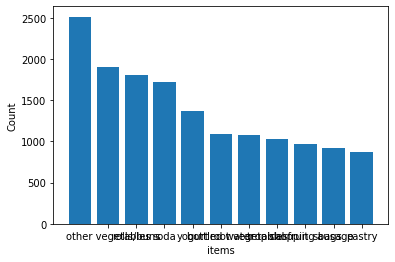

In [17]:
# barplot of top 10 

import matplotlib.pyplot as plt

plt.bar(height = frequencies[0:11],x = list(range(0,11)));plt.xticks(list(range(1,11),),items[1:11]);plt.xlabel("items")
plt.ylabel("Count")

In [18]:
# Creating Data Frame for the transactions data 

groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction

In [19]:
groceries_series.columns = ["transactions"]


In [20]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [21]:
frequent_itemsets = apriori(X, min_support=0.005, max_len=3,use_colnames = True)

e:\Python\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Text(0, 0.5, 'support')

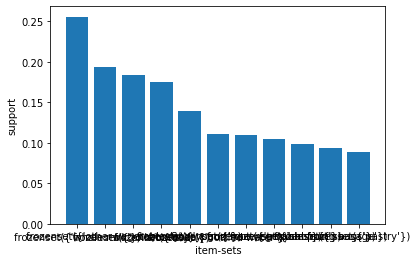

In [34]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
plt.bar(list(range(0,11)),frequent_itemsets.support[0:11]);plt.xticks(list(range(0,11)),frequent_itemsets.itemsets[0:11])
plt.xlabel('item-sets');plt.ylabel('support')


In [29]:

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2559,(ham),(white bread),0.026029,0.042095,0.005084,0.195312,4.639851,0.003988,1.190407
2558,(white bread),(ham),0.042095,0.026029,0.005084,0.120773,4.639851,0.003988,1.107758
2022,(whipped/sour cream),"(butter, other vegetables)",0.071683,0.020031,0.005796,0.080851,4.036397,0.004360,1.066171
2019,"(butter, other vegetables)",(whipped/sour cream),0.020031,0.071683,0.005796,0.289340,4.036397,0.004360,1.306275
1311,(root vegetables),(herbs),0.108998,0.016268,0.007016,0.064366,3.956477,0.005243,1.051406
1310,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596
2056,"(root vegetables, other vegetables)",(onions),0.047382,0.031012,0.005694,0.120172,3.875044,0.004225,1.101338
2057,(onions),"(root vegetables, other vegetables)",0.031012,0.047382,0.005694,0.183607,3.875044,0.004225,1.166862
2199,(tropical fruit),"(pip fruit, citrus fruit)",0.104931,0.013828,0.005592,0.053295,3.854060,0.004141,1.041688
2194,"(pip fruit, citrus fruit)",(tropical fruit),0.013828,0.104931,0.005592,0.404412,3.854060,0.004141,1.502831
